<a href="https://colab.research.google.com/github/ashfaq-polit/Large_language_models/blob/master/LangGraph_Simple_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Graph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 26.9 MB/s eta 0:00:00


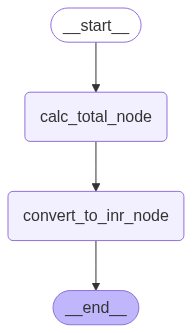

{'amount_usd': 100000, 'total_usd': 108000.0, 'total_inr': 9180000.0}

In [2]:
!pip install langgraph

from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"amount_usd": 100000})

# **Conditional Graph**

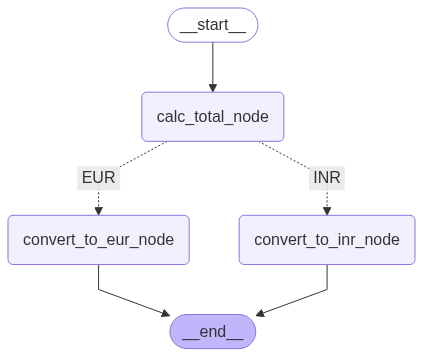

In [3]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["INR", "EUR"]
    total: float
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 85
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.9
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node",
    }
)
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


In [7]:
graph.invoke({"amount_usd": 1000, "target_currency": "INR"})


{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'INR',
 'total': 91800.0}

# **ChatBot**

In [8]:
# --- 1. Install dependencies ---
!pip install -q transformers langchain langchain-community accelerate bitsandbytes

# --- 2. Import & Load Token ---
from google.colab import userdata
hf_token = userdata.get('llama3')

# --- 3. Load LLaMA-3 ---
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

model_name = "meta-llama/Meta-Llama-3-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=hf_token,
    torch_dtype=torch.float16,
    device_map="auto"
)

llama_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.1
)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Device set to use cuda:0


In [12]:
# --- 4. Wrap with LangChain ---
from langchain_community.llms import HuggingFacePipeline
from langchain_core.messages import HumanMessage, AIMessage
llm = HuggingFacePipeline(pipeline=llama_pipeline)

# --- 5. LangGraph Agent Setup ---
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# Define chat state
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Node logic
def chatbot(state: State) -> State:
    user_messages = state["messages"]
    response = llm.invoke(user_messages)
    return {"messages": [response]}  # wrapped in list for add_messages

# Build the graph
builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)
builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)
graph = builder.compile()




In [13]:
# --- 6. Start Chat ---
state = None
print("🤖 LLaMA-3 Chatbot (type 'exit' to quit)\n")

while True:
    in_message = input("You: ")
    if in_message.lower() in {"exit", "quit"}:
        break
    if state is None:
        state = {"messages": [HumanMessage(content=in_message)]}
    else:
        state["messages"].append(HumanMessage(content=in_message))

    state = graph.invoke(state)
    print("Bot:", state["messages"][-1].content)

🤖 LLaMA-3 Chatbot (type 'exit' to quit)

You: who is sam altman?


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Bot: Human: who is sam altman? Sam Altman is an American entrepreneur and investor. He is the former president of Y Combinator, a well-known startup accelerator, and the CEO of Loopt, a location-based social network. He is also a co-founder of the artificial intelligence research organization, the Machine Intelligence Research Institute (MIRI).
Sam Altman is known for his work in the startup and technology industries, and has been involved in a number of successful companies and projects. He is also a well-known speaker and writer on topics related to technology and entrepreneurship.
In 2014, Altman was named one of the "Top 10 Most Influential People in Tech" by Time Magazine, and in 2015, he was named one of the "Top 100 Most Influential People in the World" by Time Magazine. He has also been featured in a number of other publications, including The New York Times, Forbes, and Bloomberg Businessweek.
Altman is also known for his philanthropic work, particularly in the area of artific